# Final Exam - DS 3000B 2022

## Student ID: XXXXXXXXX

## General comments

This Final integrates knowledge and skills acquired during the whole semester. You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the exam.** To finish the exam in the alloted 4 hrs, you will have to work efficiently. **Read the entirety of each question carefully.**

You need to submit the final by the due date (13:00) on OWL in the Test & Quizzes / Final section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded.  

Most question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are asking yourself "are we supposed to...", then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [ ]:
# Install UMAP, SHAP and yellowbrick if needed
!pip install umap-learn shap yellowbrick

     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 564 kB 41.4 MB/s 
     |████████████████████████████████| 1.1 MB 37.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e783cbaa0eb3abe2b2f0643fd4f2249ca5951b7a4e982144b433e840b402b19f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=86ec7bcb4172cfac0055fc3d349e75f0cdacd6a7da3464d50c885188c9e0fd99
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
## Preliminaries
# Sets up the environment by importing 
# pandas, numpy, matplotlib, searborn, sklearn, scipy.
# No other packages are allowed in solving the final.   

# Basics
import pandas as pd
import numpy as np

# Models and metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# tensorflow
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers

# Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# UMAP
import umap

# Shap
import shap

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data set

You are given a dataset, `bank_data.csv`, which includes details of a bank's clients and the target variable is a binary variable reflecting whether the client closed their account or they continued to be with the bank (a phenomenon known as **churn**). Banks spend a large amount of resources in keeping their customers, as retaining a customer is much cheaper than capturing a new customer (try to cut your internet and see what happens!). The following variables are given in the dataset:

1. Credit_Score: Credit score of the client.
2. Age: Age of the client.
3. Tenure: Number of years for which the client has been with the bank.
4. Balance: Bank balance of the client.
5. Number_of_Products: Number of bank products the client is using.
6. Has_Credit_Card (binary): 1 if the client has a credit card with the bank, 0 otherwise.
7. Active_Member (binary): 1 if the client is an active member, 0 otherwise.
8. Estimated_Salary: Estimated salary of the client.
9. Closed_Account (binary, target variable): 1 if the client closed their account, 0 otherwise.

With this information, execute the following tasks using your knowledge from the course.

In [ ]:
# Download the data if using online platforms
!gdown https://drive.google.com/uc?id=1Ng3J8joHC7xlGAKyvEtHpXrBzszTu7OZ

Downloading...
From: https://drive.google.com/uc?id=1Ng3J8joHC7xlGAKyvEtHpXrBzszTu7OZ
To: /content/bank_data.csv
100% 342k/342k [00:00<00:00, 84.1MB/s]


## Task 1 (35 points UG, 25 points PG)
Before we start working on a predictive models for whether somebody will leave the company or not, in task 1 we will first build a model to predict the typical credit score of a person given other data. This can be useful as it may be a company wants to target customers within a certain range of risk, or because obtaining the credit scores for all customers may not be cost-effective.

### Question 1.1 (20% of task's points):
a. Import the dataset and report the data shape. Are there any null values?

b. Present the descriptive statistics of the variables.

c. Create a distribution plot that shows both the KDE and the histogram of the ```Credit_Score``` variable. **Written answer: What distribution does this variable have?**

In [ ]:
# Import the dataset
bank_data = pd.read_csv('bank_data.csv')

# Print the data shape
print(f'The data shape is:{bank_data.shape}')

# Print the number of null values
print(f'The number of null values is :{bank_data.isnull().sum().sum()}')

The data shape is:(10000, 9)
The number of null values is :0


In [ ]:
# Present the descriptive statistics
bank_data.describe()

,Credit_Score,Age,Tenure,Balance,Number_of_Products,Has_Credit_Card,Active_Member,Estimated_Salary,Closed_Account
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


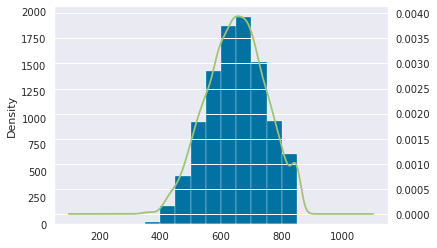

In [ ]:
# Create the histogram
sns.set_style("darkgrid") 

# Plot histogram and KDE
ax = bank_data.Credit_Score.plot(kind='hist')
bank_data.Credit_Score.plot(kind='kde', ax=ax, secondary_y=True)
plt.show()

**Written answer: The credit scoring variable has truncated normal shape. (Students may describe this as a normal with a missing element or similar description).**

### Question 1.2 (20% of task's points):
a. Define X (predictors) and y (target) for your problem. Your target corresponds to the ```Credit_Score``` variable 

b. Split the data into X_train, X_test, y_train, y_test with `test_size = 0.3` and `random_state = 2022`. Do not use ```Credit_Score```as a predictor in your model.

c. Apply a `MinMaxScaler` to both the training and the test data (X_train, X_test).

In [ ]:
# Define X and y
X = bank_data.drop(['Credit_Score'], axis = 1)
y = bank_data.Credit_Score

In [ ]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

In [ ]:
# Scale the features for X_train and X_test
sc = MinMaxScaler()
X_train_range = sc.fit_transform(X_train)
X_test_range = sc.transform(X_test)

### Question 1.3 (60% of task's points)

Now we will train a couple of models and study their behaviour. 

a. Train an unregularized linear regression and calculate the MSE error over the test set. Show the coefficients and the variable they refer to.

b. Now train a Ridge model, tuning the alpha value between 0 and 1000 in intervals of 50. Use five crossvalidation folds over the train set using a ```KFold``` object with a random seed of 2022 and ```shuffle=True```, you can use ```RidgeCV``` if desired. Show the optimal alpha value, the trained coefficients, and the variables they refer to.

c. Create a jointplot of the two predictions over the test set (a scatterplot of the prediction of the model in a and the model in b).  **Written answer: Where are performances different?**.

d. Using a normal approximation, calculate the CI for the test set error (squared residuals). **Written answer: Which model performs best? Why do you think this happens? Why can you use a normal approximation for this error? Which one would you use?**

In [ ]:
# Unregularized regression
regr_unreg = LinearRegression()
regr_unreg.fit(X_train_range, y_train)

# Create output DF
pd.DataFrame(data={'Variables': bank_data.columns[np.r_[1:9]],
                   'Coefficients': regr_unreg.coef_}
            )

,Variables,Coefficients
0,Age,5.954538
1,Tenure,0.714210
2,Balance,3.085685
3,Number_of_Products,0.393762
4,Has_Credit_Card,-0.409414
5,Active_Member,4.296964
6,Estimated_Salary,-2.425380
7,Closed_Account,-7.543068


In [ ]:
# Ridge
cv_object = KFold(n_splits=5,
                  random_state=2022,
                 shuffle=True)
regr_ridge = RidgeCV(alphas=np.arange(0.1, 1050, 50),
               cv=cv_object)
regr_ridge.fit(X_train_range, y_train)

# Best alpha
print('The best value of alpha is %i' % regr_ridge.alpha_)

# Create output DF
pd.DataFrame(data={'Variables': bank_data.columns[1:9],
                   'Coefficients': regr_ridge.coef_}
            )

The best value of alpha is 950


,Variables,Coefficients
0,Age,0.453160
1,Tenure,0.251979
2,Balance,0.732271
3,Number_of_Products,-0.059419
4,Has_Credit_Card,-0.310095
5,Active_Member,3.169681
6,Estimated_Salary,-0.943082
7,Closed_Account,-3.833477


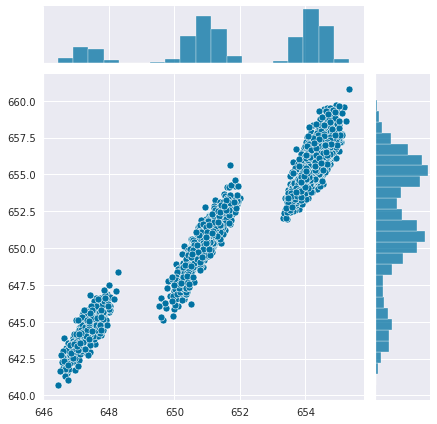

In [ ]:
# Joint plot
sns.jointplot(x=pred_ridge, y=pred_unreg)
plt.show()

**Written answer: Both models have similar errors and distributions, but the Ridge model is more concentrated than the unregularized model. Interestingly, the credit scoring range is fairly concentrated between a few values (as opposed to the much wider range of the original distribution) and there are three clearly demarcated groups.**

In [ ]:
# Get the mean-square test error
pred_ridge = regr_ridge.predict(X_test_range)
mse_ridge = mean_squared_error(y_test, pred_ridge)
res2  = (y_test-pred_ridge)**2
Testerror  = np.mean(res2)

# Get standard error and CI
sem = np.std(res2)/np.sqrt(res2.shape[0])
CI = [Testerror-1.96 * sem, Testerror+1.96*sem]
print(f'The mean test error for the ridge model is {Testerror:.4f}')
print(f'The 95% Confidence interval is {CI[0]:.2f} - {CI[1]:.2f}')
plt.show()

The mean test error for the ridge model is 9405.0926
The 95% Confidence interval is 8982.85 - 9827.34


In [ ]:
# Get the mean-square test error
pred_unreg = regr_unreg.predict(X_test_range)
mse_unreg = mean_squared_error(y_test, pred_unreg)
res2  = (y_test-pred_unreg)**2
Testerror  = np.mean(res2)

# Get standard error and CI
sem = np.std(res2)/np.sqrt(res2.shape[0])
CI = [Testerror-1.96 * sem, Testerror+1.96*sem]
print(f'The mean test error for the unregularized model is {Testerror:.4f}')
print(f'The 95% Confidence interval is {CI[0]:.2f} - {CI[1]:.2f}')
plt.show()

The mean test error for the unregularized model is 9410.1248
The 95% Confidence interval is 8987.93 - 9832.32


**Written answer: Both models have statistically similar performance, as the CI's overlap. The unregularized model has a slightly shifted distribution than the ridge model. This can be as the extra variables in the unregularized model add extra variance to the estimates, sometimes improving (or harming) errors. As both models are almost identical in statistical terms, both can be used, but normally one would pick the most parsimonious one (Ridge), although a good argument for the unregularized model would also be correct. The normal approximation is valid as we are calculating the mean squared error, which distributes normally (as it is a mean).**

## Task 2: Tree-based ensemble (35 pts UG, 30 PG)

In the second question, we will now study the impact of interaction terms (i.e. if you have two variables $x_1$ and $x_2$, adding the multiplication of the terms $x_1 \cdot x_2$) in XGB models. While XGB is a non-linear model, interactions may help to determine more complex relationships.

First, let's reimport the data and create a new dataset.

### Question 2.1 Data Import (10% of task's points)

a. Reimport the data and separate the target variable (```Closed_Account```) from the input variables (the remaining ones). For the rest of the final, ```credit_score``` will be used as one of the predictors, so be sure to include it.

b. Use a ```PolynomialFeatures``` object to create the interactions terms only (i.e. set ```interaction_only=True```). Do not include the biases in the polynomial object either.

c. Generate a train/test split using 70% for training and the remaining for testing. Use a random seed of 2022.

In [ ]:
# Import the dataset
bank_data = pd.read_csv('bank_data.csv')

# Define X and y
X = bank_data.drop(['Closed_Account'], axis = 1)
y = bank_data.Closed_Account

# Create polynomial features
poly_transformer = PolynomialFeatures(interaction_only=True, include_bias=False)
X = poly_transformer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 2022)

### Question 2.2 (30% of task's points)

Now train an XGB model using only the original variables without interaction. *Hint: The variables are ordered so that the first ones are the original ones and the remaining ones the interactions. You can see the variable names by running ```poly_transformer.get_feature_names_out()``` after you fit it, with ```poly_transformer``` the name of your ```PolynomialFeatures``` object.*

a. Tune the parameters using the following grid:

```
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3],
                 'learning_rate' : [0.001, 0.01, 0.1]
                  })
```                  
Use a ```GridCV``` object with a ```StratifiedKFold``` as input using 3 folds and ```shuffle=False```. Remember to set the ```scale_pos_weight``` Parameter to an appropriate value. Report the best parameters.

b. Calculate AUC and plot the ROC curve for the model.

c. Plot the SHAP variable importance (beeswarm plot) for the output variables.

**Written answer: Analyze the beeswarm plot. What can you see? How do the variables relate to the output? Analyze the distribution of the top three variables.**

In [ ]:
# Check variables to get order
poly_transformer.get_feature_names_out()

array(['Credit_Score', 'Age', 'Tenure', 'Balance', 'Number_of_Products',
       'Has_Credit_Card', 'Active_Member', 'Estimated_Salary',
       'Credit_Score Age', 'Credit_Score Tenure', 'Credit_Score Balance',
       'Credit_Score Number_of_Products', 'Credit_Score Has_Credit_Card',
       'Credit_Score Active_Member', 'Credit_Score Estimated_Salary',
       'Age Tenure', 'Age Balance', 'Age Number_of_Products',
       'Age Has_Credit_Card', 'Age Active_Member', 'Age Estimated_Salary',
       'Tenure Balance', 'Tenure Number_of_Products',
       'Tenure Has_Credit_Card', 'Tenure Active_Member',
       'Tenure Estimated_Salary', 'Balance Number_of_Products',
       'Balance Has_Credit_Card', 'Balance Active_Member',
       'Balance Estimated_Salary', 'Number_of_Products Has_Credit_Card',
       'Number_of_Products Active_Member',
       'Number_of_Products Estimated_Salary',
       'Has_Credit_Card Active_Member',
       'Has_Credit_Card Estimated_Salary',
       'Active_Member Estimate

In [ ]:
# Get weights
y_train.value_counts()

0    5586
1    1414
Name: Closed_Account, dtype: int64

In [ ]:
#Define the classifier.
XGB_Bankloan = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            scale_pos_weight=5586.0/1414.0,           # Balancing of positive and negative weights.
                            random_state=2022        # Seed
                            )

In [ ]:
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3],
                 'learning_rate' : [0.001, 0.01, 0.1]
                  })

# Crossvalidation object
cv_object = StratifiedKFold(n_splits=3)

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = cv_object,      # Cross-validation object.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
# Train grid search.
GridXGB.fit(X_train[:, 0:8], y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(gamma=0.001, n_jobs=2, random_state=2022,
                                     scale_pos_weight=3.9504950495049505,
                                     subsample=0.632),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Show best params
GridXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

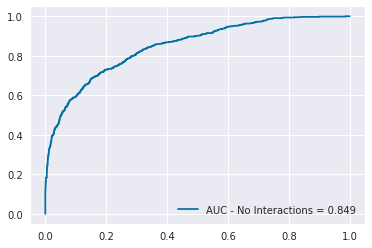

In [ ]:
# Calculate probability
probTest = GridXGB.predict_proba(X_test[:, 0:8])
probTest = probTest[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_test, 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - No Interactions = " + str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# the variable importance by mean-shap values
explainer = shap.Explainer(GridXGB.best_estimator_)
shap_values = explainer(X_test[:, 0:8])

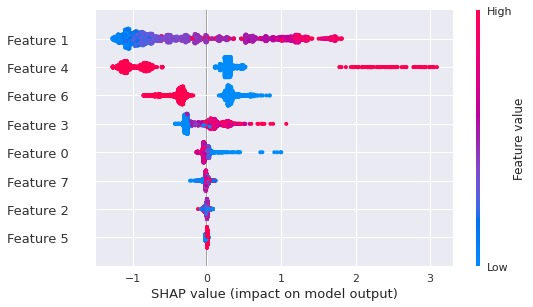

In [ ]:
shap.plots.beeswarm(shap_values)

**Written answer: We can see that Age is the best predictor, followed by Number of Products and whether the borrower is an active member. For Age, younger customers are less likely to churn, with an almost linear increase. Older customers are much more likely to churn. For Number of Products, there is a clear non-linear behaviour, with customers with a high number of products being either low risk and high risk of churn. Reasonably, if the customer is an active member then the churn risk is lower to a customer that is not.**

### Question 2.3 Interactions and conclusion (60% of task's points)

Now do the same again, but now use all the training variables, including interactions.

a. Tune the parameters using the same ranges as the previous question. **Written answer: How do the parameters change between the previous model and this one? Why do you think that is?**

b. Calculate AUC and plot the ROC curve for the model. **Written answer: Compare the prediction capabilities of the two models. What impact do the interactions have on the prediction?**

c. Plot the SHAP variable importance (beeswarm plot) for the output variables. **Written answer: Analyze the top three resulting variables and compare them with the previous plot if they were available.**

d. **Written answer: Conclude on our original question, comparing the trade-off between interpretability and performance. Do interactions help? Is a non-linear model like XGB able to automatically construct interactions or is it worth it to add them yourself? Why do you think this is?**

In [ ]:
#Define the classifier.
XGB_Bankloan = XGBClassifier(max_depth=3,                 # Depth of each tree
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=2,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            scale_pos_weight=5586.0/1414.0,           # Balancing of positive and negative weights.
                            random_state=2022        # Seed
                            )
# Define the parameters. Play with this grid!
param_grid = dict({'n_estimators': [50, 100, 150],
                   'max_depth': [2, 3],
                 'learning_rate' : [0.001, 0.01, 0.1]
                  })

# Crossvalidation object
cv_object = StratifiedKFold(n_splits=3)

# Define grid search object.
GridXGB = GridSearchCV(XGB_Bankloan,        # Original XGB. 
                       param_grid,          # Parameter grid
                       cv = cv_object,      # Cross-validation object.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = True,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

In [ ]:
# Train grid search.
GridXGB.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(gamma=0.001, n_jobs=2, random_state=2022,
                                     scale_pos_weight=3.9504950495049505,
                                     subsample=0.632),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [2, 3], 'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=1)

In [ ]:
# Show best params
GridXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

**Written answer: As we now have more variables, the number of estimators grew. However the max_depth decreased, which probably indicates stronger predictors within the interactions, as you have less cuts.**

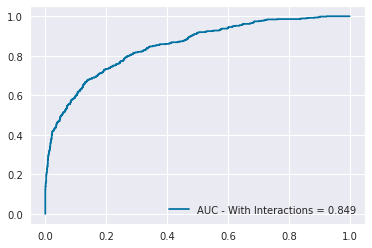

In [ ]:
# Calculate probability
probTest = GridXGB.predict_proba(X_test)
probTest = probTest[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_test, 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - With Interactions = " + str(auc))
plt.legend(loc=4)
plt.show()

**Written answer: The AUC is identical. As XGB is a non-linear model, it is able to extract non-linear interactions from the data and reach the same prediction value.**

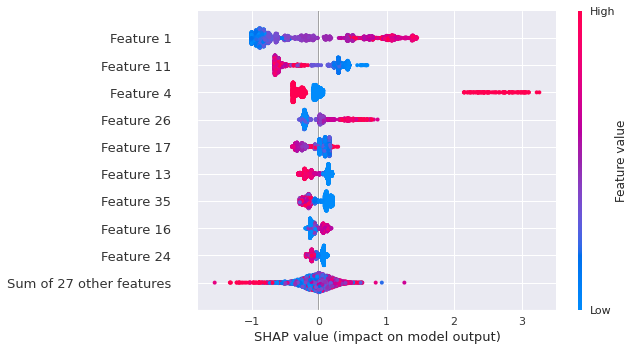

In [ ]:
# the variable importance by mean-shap values
explainer = shap.Explainer(GridXGB.best_estimator_)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)

**Written answer: Age and Number of Products are still within the top three with similar behaviours but, interestingly, with lower Shapley value ranges, indicating some of these behaviours are now captured by the interactions. The second term is now an interaction (```Credit_Score * Number_of_Products```), which measures both the risk of the customer and how involved they are with the company. Low values, showing both high risk AND low involvement, are associated with high churn risks, while mid to large values (meaning either low risk, high number of products, or both) reduces the churn risk.**

**Written answer: In conclusion, while adding interactions does not lead to a predictive improvement given the non-linear capabilities of XGB, it DOES lead to a better interpretability, thus a user may want to include these terms explicitely so they can better conclude on their relevance.**

## Task 3: Unsupervised learning (30 pts UG, 20 PG)

In the previous questions, we could see there seem to be clear groups within our data. In this question we will study whether this is true or not.

### Question 3.1 (10% of task's points)

Reimport the data once more and normalize them using a MinMaxScaler. Use all variables as input.

In [ ]:
# Import the dataset
bank_data = pd.read_csv('bank_data.csv')

# Scale the features for the data
sc = MinMaxScaler()
X_range = sc.fit_transform(bank_data)

### Question 3.2 K-Means (60% of task's points)

Run a K-Means algorithm testing between 2 and 8 groups. Use a seed of 2022 for all objects that accept it. Plot both the silhouette plots and the elbow plots.

**Written answer: How many clusters do think are in the data?**

In [ ]:
# Initializing the cluster algorithm
KClusterer = KMeans(n_clusters=2,
                    verbose=0, # Name of operator and cluster number
                    random_state=2022
                    )

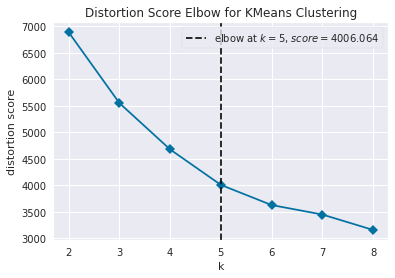

In [ ]:
# Initialize the object
visualizer = KElbowVisualizer(KClusterer, # Cluster model with any parameters you need
                              k=(2,9),   # Number of clusters to test (2 to 8 in this case)
                              locate_elbow=True, # Locate the elbow? Default is true.
                              timings=False # Plot the timings to train?
                             )   

visualizer.fit(X_range)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

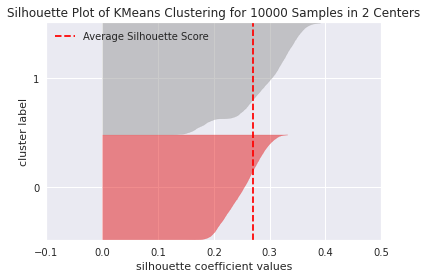

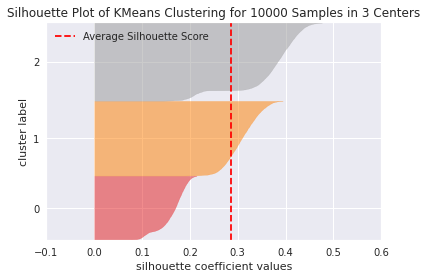

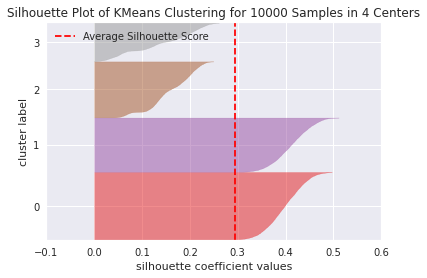

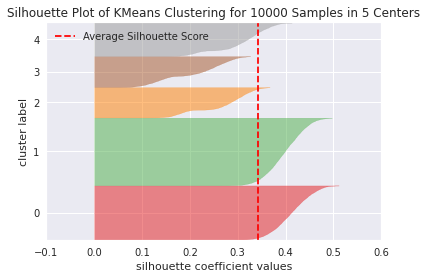

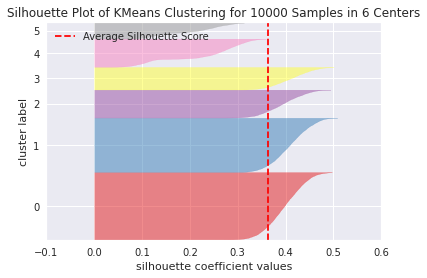

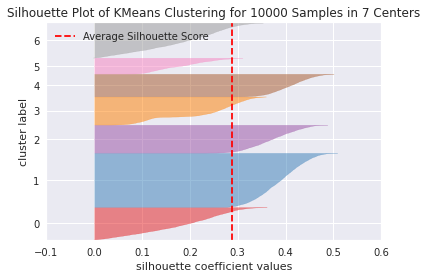

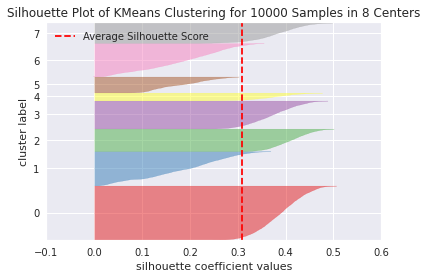

In [ ]:
for k in np.arange(2, 9):
  KClusterer = KMeans(n_clusters=k,
                   verbose=0)
  visualizer = SilhouetteVisualizer(KClusterer) # Get the kmeans model
  visualizer.fit(X_range) # Pass the scaled data
  visualizer.show() # show the plot
  plt.show()

**Written answer:** The elbow plot suggests there are five clusters in the data, while the silhouette score presents a more complex picture:
- Using the maximization of the silhouette score alone, there are 7 clusters in the data, but these are fairly malformed (some small, some large, with large deviations from the centre).
- Both five and six clusters seem to show dispersion around the average with a sufficiently large silhouette score, thus being similar options.

With this in mind, it would make sense to use either five or six, depending on the application focus.

### Question 3.3 (30% of task's points)

Now create a UMAP projection of the data to two dimensions, using 15 nearest neighbours, min_dist of 0.1, spread of 1, an appropriate distance metric, and a random seed of 2022, and plot the resulting scatterplot differentiating the clusters using the cluster membership as colouring. Use the number of clusters you found using the **elbow method**.

**Written answer: Justify the metric you used. What can you see in the plot? What can you say about the clusters?**

In [ ]:
# Initializing the cluster algorithm
KClusterer = KMeans(n_clusters=5,
                    verbose=0,
                    random_state=2022) # Name of operator and cluster number

# Retrain clustering
cluster_label = KClusterer.fit_predict(X_range)


UMAP(random_state=2022, verbose=True)
Thu Apr 14 19:07:52 2022 Construct fuzzy simplicial set
Thu Apr 14 19:07:52 2022 Finding Nearest Neighbors
Thu Apr 14 19:07:52 2022 Building RP forest with 10 trees


The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.


Thu Apr 14 19:07:56 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Thu Apr 14 19:08:09 2022 Finished Nearest Neighbor Search
Thu Apr 14 19:08:12 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Apr 14 19:08:38 2022 Finished embedding


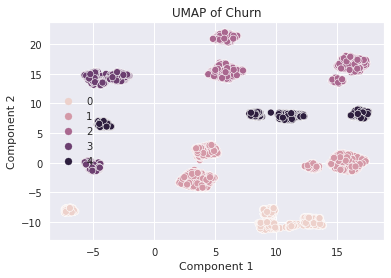

In [ ]:
# Let's create the object
reducer = umap.UMAP(n_neighbors=15,              # Number of neareast neighbours to use. 
                    n_components=2,              # Number of components. UMAP is robust to larger values
                    metric='euclidean',          # Metric to use.
                    n_epochs=None,               # Iterations. Set to convergence. None implies either 200 or 500.
                    min_dist=0.1,                # Minimum distance embedded points. Smaller makes clumps, larger, sparseness.
                    spread=1.0,                  # Scale to combine with min_dist
                    low_memory=True,             # Run slower, but with less memory.
                    n_jobs=-1,                   # Cores to use
                    random_state=2022,             # Random seed
                    verbose=True                 # Verbosity
                   )

# Now we train and calculate the embedding!
UMAP_embedding = reducer.fit_transform(X_range)

# Create plot
sns.scatterplot(x=UMAP_embedding[:, 0], y=UMAP_embedding[:, 1], hue=cluster_label)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("UMAP of Churn")
plt.show()

**Written answer: As this is a normalized, continuous, dataset, euclidean distance is the most appropriate one. We see there are clear groups in the data, with most clusters correctly defined, except for group 2 having an "inlay" into group 4. It would be interesting to study these customers to understand what is happening there. The rest of clusters have clear "lumps" in the data but are close together. Group 3 seems to be the most correctly defined.**

## Task 4 (Graduate students only, optional for UG): Neural Networks (25 pts)

### Question 4.1 Preparing the data. (5 pts)

In order to train a neural network, you need to first normalize the data and then create the iterator for the training set. Reimport the data, split it in a training and testing set using ```Closed_Account``` as a target variable and a seed of 2022, and finally standardize the data using a ```StandardScaler``` method.

In [ ]:
# Reload the data and filter
bank_data = pd.read_csv('bank_data.csv')
X = bank_data.drop(['Closed_Account'], axis = 1)
y = bank_data.Closed_Account

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

# Standard scaler. Important to train in training data and applying in testing data (2 pts)
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train)
X_test_scaled = normalizer.transform(X_test)

### Question 4.2 (15 pts):
Now you are ready to create your architecture. You want to create a dense structure with three hidden layers. Create an architecture with the following properties:

- The number of inputs to the network is the number of columns in X_train.
- Numbers of neurons for first, second, and third hidden layers are 10, 20, and 6, respectively.
- Hidden layers with `relu` activation function.
- Apply Dropout regularization with rate of 0.2 after each hidden layer.
- Output layer has `sigmoid` activation function with one neuron (as it is a binary problem).
- Use `adam` for optimizer, `binary_crossentropy` for loss, and `accuracy` for metrics.
- Train the model with 100 epochs with a batch size of 128. Use a validation split of 30%. Balance the sample using the argument class_weight in your fit call (see [here](https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras) for help)

Plot the training history of the model. **Written answer: How many epochs it takes to converge? Do you see overfitting?**

In [ ]:
# Initialize a sequential model (ANN)
classifier = models.Sequential()

# Add the input layer and the first hidden layer
classifier.add(layers.Dense(units = 10, activation = 'relu', input_dim = 8))
classifier.add(layers.Dropout(rate = 0.2))

# Add the second hidden layer
classifier.add(layers.Dense(units = 20, activation = 'relu'))
classifier.add(layers.Dropout(rate = 0.2))

# Add the third hidden layer
classifier.add(layers.Dense(units = 6, activation = 'relu'))
classifier.add(layers.Dropout(rate = 0.2))

# Add the output layer
classifier.add(layers.Dense(units = 1, activation = 'sigmoid'))

# Compile the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Set class weights
class_weight = {0: 1.,
                1: 5586.0/1414.0
                }

# Fit the ANN to the training set
history = classifier.fit(X_train_scaled, #X
                    y_train.values, #Y
                    epochs = 100, # Rounds of training
                    batch_size=128, # Size of elements
                    validation_split= 0.3,
                    class_weight=class_weight) # Validation split

Epoch 1/100
39/39 [==============================] - 1s 10ms/step - loss: 1.1927 - accuracy: 0.4863 - val_loss: 0.7084 - val_accuracy: 0.5138
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 1.0973 - accuracy: 0.5708 - val_loss: 0.6760 - val_accuracy: 0.6067
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 1.0826 - accuracy: 0.6112 - val_loss: 0.6604 - val_accuracy: 0.6600
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.6302 - val_loss: 0.6543 - val_accuracy: 0.6600
Epoch 5/100
39/39 [==============================] - 0s 5ms/step - loss: 1.0316 - accuracy: 0.6476 - val_loss: 0.6360 - val_accuracy: 0.6833
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 1.0301 - accuracy: 0.6537 - val_loss: 0.6260 - val_accuracy: 0.6929
Epoch 7/100
39/39 [==============================] - 0s 5ms/step - loss: 1.0119 - accuracy: 0.6612 - val_loss: 0.6212 - val_accuracy: 0.6867
Epoch 8/100


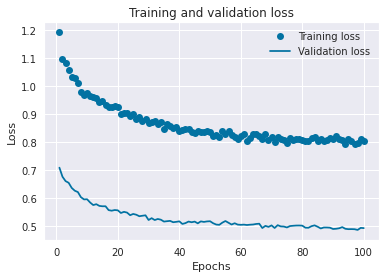

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Written answer: The model does not overfit and converges around 80 epochs.**

### Question 4.3 (5 pts)
a. Now it is time to evaluate the model. Find the accuracy for both training and test set.

b. Make a confusion matrix for the test set and display it as a heatmap.

c. Plot the ROC curve for the test set and display the AUC value. **Written answer: How does it compare to the AUC of the XGB model? Why do you think this is?**

In [ ]:
# Apply to training set
score_train, acc_train = classifier.evaluate(X_train_scaled, y_train.values)

# Apply to test set
score_test, acc_test = classifier.evaluate(X_test_scaled, y_test.values)


94/94 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.7743


In [ ]:
print('Train accuracy: %.2f%%' % (acc_train*100))
print('Test accuracy: %.2f%%' % (acc_test*100))

Train accuracy: 77.60%
Test accuracy: 77.43%


Text(0.5, 15.0, 'Predicted Label')

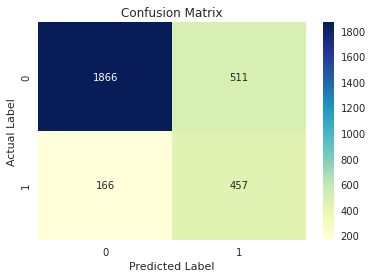

In [ ]:
# Make the Confusion Matrix
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test.values, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

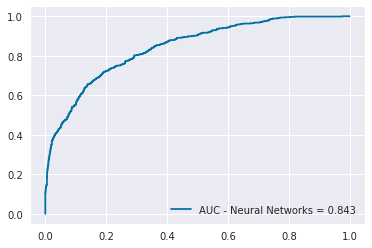

In [ ]:
# Calculate probability
probTest = classifier.predict(X_test_scaled)
probTest = probTest

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, 
                                 probTest)

# Save the AUC in a variable to display it. Round it first
auc = np.round(roc_auc_score(y_true = y_test, 
                             y_score = probTest),
               decimals = 3)

# Create and show the plot
plt.plot(fpr,tpr,label="AUC - Neural Networks = " + str(auc))
plt.legend(loc=4)
plt.show()

**Written answer: We can see the neural network performs slightly worse than the XGB model, as expected. In general, neural networks are not as effective over structured data as tree-based methods. However, performance is almost identical and implementing a neural network is easier, so a user may prefer to use an ANN in this case. (An alternative answer follows) Also, we tuned the XGB model to optimality, while the neural network was given, thus we can expect a better performance from the XGB model.**